In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [20]:
import math

In [38]:
P = 10
T = 2
m = 28
n = 28
MAX_I = 1.

def image_compression(P, T=2):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(m, n)))
    model.add(layers.Dense(P))
    model.add(layers.Dense(m * n * T, activation='relu'))
    model.add(layers.Dense(m * n))
    model.add(layers.Reshape((m, n)))
    
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

    model.fit(train_images, train_images, epochs=10, batch_size=64)

    test_loss, test_acc = model.evaluate(test_images, test_images)
    
    test_pred = model.predict(test_images)

    psnr = 10 * math.log10(MAX_I ** 2 / test_loss)
    print("PSNR for P=" + str(P) + " is " + str(psnr))
    return psnr, test_pred

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0227 - accuracy: 0.1152
Epoch 2/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0163 - accuracy: 0.1469
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0153 - accuracy: 0.1588
Epoch 4/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0148 - accuracy: 0.1660
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0144 - accuracy: 0.1713
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0142 - accuracy: 0.1751
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0140 - accuracy: 0.1779
Epoch 8/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0138 - accuracy: 0.1798
Epoch 9/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0137 - accuracy: 0.1817
Epoch

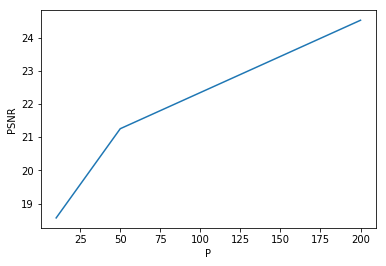

In [40]:
import matplotlib.pyplot as plt
import numpy as np
P_list = [10, 50, 200]
PSNR = []
pred_imgs = np.zeros((3, 10, 28, 28))
for i, P in enumerate(P_list):
    psnr, pred_img = image_compression(P)
    pred_imgs[i] = pred_img[:10]
    PSNR.append(psnr)
plt.plot(P_list, PSNR)
plt.xlabel('P')
plt.ylabel('PSNR')
plt.show()

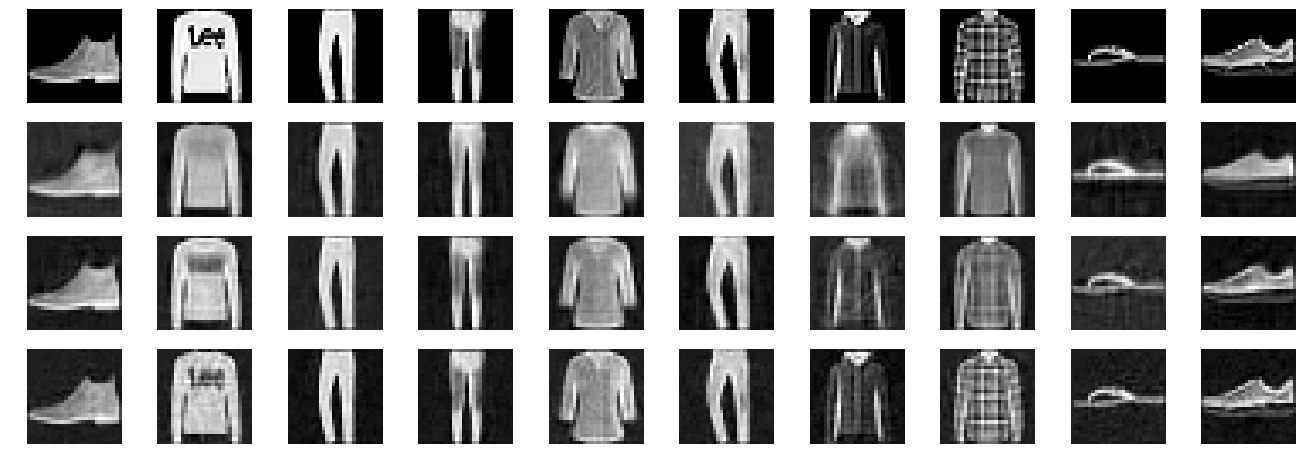

In [64]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(23, 8))
for i in range(10):
    f.add_subplot(4, 10, i+1)
    plt.axis('off')
    plt.imshow(test_images[i], cmap='gray')
    f.add_subplot(4, 10, i+11)
    plt.axis('off')
    plt.imshow(pred_imgs[0][i], cmap='gray')
    f.add_subplot(4, 10, i+21)
    plt.axis('off')
    plt.imshow(pred_imgs[1][i], cmap='gray')
    f.add_subplot(4, 10, i+31)
    plt.axis('off')
    plt.imshow(pred_imgs[2][i],cmap='gray')
plt.savefig('Task2.png')